**Description**

This is an introduction to neural network tools for classification problem. You will design and train deep neural networks for binary classification using [Keras](https://keras.io/).

**Dataset**

For this homework we will use a dataset that has two classes, cracks, and no-cracks. Download the dataset from GitHub and save it into your working folder for this homework. <br>


**Some Tutorials (Keras)**

- You will be using Keras for deep neural network learning toolbox (follow the [link](https://keras.io/) for installation).
- For Keras beginners, please read this [tutorial](https://keras.io/getting_started/) before doing your homework.
- Feel free to look at some examples at https://keras.io/examples/.
- Feel free to read image_data processing here at https://keras.io/api/preprocessing/image/.


In [1]:
## In case you use Google Colab

# Mount your google drive
#from google.colab import drive
#drive.mount('/content/drive')

# spcifying the working directory
#%cd '/content/drive/MyDrive/Colab Notebooks'

In [2]:
## uncomment and install tensorflow if it has not been installed yet

#!pip install tensorflow


In [3]:
# import packages

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator    #ImageDataGenerator is a built-in keras function to load data
from tensorflow.keras.models import Sequential                         #Sequential groups a linear stack of layers into a keras.Model
from tensorflow.keras.layers import Input, Activation, Flatten, Dense  # different types of layers of NN
from tensorflow.keras import backend as K                              #provides functions for interacting with the backend engine (such as TensorFlow) used by Keras. 

import matplotlib.pyplot as plt
import numpy as np
import random

In [4]:
###################################################
# Loading the training and testing data
##################################################

# Define the dimensions of input images. 
# We will load the data with a much smaller dimension to reduce computation.
img_width, img_height = 28, 28

#Directory of the dataset
train_data_dir = 'Data/NNdata/train'
validation_data_dir = 'Data/NNdata/test'

#number of samples
nb_train_samples = 960         #number of images inside train directory
nb_validation_samples = 240    #number of images inside test directory
epochs = 15  # each epoch is one complete cycle of processing all training data
batch_size = 128 # training sample number per batch

#Prepare the training data using the built-in function ImageDataGenerator()
train_datagen = ImageDataGenerator(
    rescale=1. / 255,               #normalizing the pixel values to 0~1
    shear_range=0.2,                #(optional) data augmentation by shearing the input image
    zoom_range=0.2,                 #(optional) data augmentation by zooming in the input image
    horizontal_flip=True)           #(optional) data augmentation by horizontal flipping the image

#Prepare the test data using the built-in function ImageDataGenerator()
test_datagen = ImageDataGenerator(rescale=1. / 255)  #normalizing the pixel values to 0~1


# To load the data, we are going to use built-in keras funcion flow_from_directory()
# it takes the path to a directory & generates batches of augmented data as we defined previously.
train_generator = train_datagen.flow_from_directory(  #loading training data
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(  #loading test data
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 960 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [5]:
# define the dimension of data
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [6]:
#################################################
# Define Network Architecture
#################################################
model = Sequential()                            #Sequential groups a linear stack of layers into a keras.Model
model.add(Input(shape=input_shape))             #Define input shape as the first layer
model.add(Flatten())                            #Flattens the input
model.add(Dense(512))                           #Dense is just your regular densely-connected NN layer.
model.add(Activation('relu'))                   #Activation applies an activation function to an output
model.add(Dense(1))
model.add(Activation('sigmoid'))

# print model summary
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 2352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,204,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,205,249 (4.60 MB)

 Trainable params: 1,205,249 (4.60 MB)

 Non-trainable params: 0 (0.00 B)

None


In [7]:
###############################################
# Configure the model for training.
###############################################
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics = ['accuracy'])

In [8]:
#we want to save the best weights in our disk
# we will save the weights when loss on test dataset is minimum
checkpoint_filepath = 'Data/NNdata/model_best_weights.weights.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                monitor='val_loss', 
                                                save_weights_only=True, 
                                                save_best_only=True, 
                                                mode='min')

In [9]:
################################################
# Optimize/Train Network
################################################

# To train the network we will use keras built-in function fit()
# which fits the model on data yielded batch-by-batch by a ImageDataGenerator

import time

start_time = time.time()

history= model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    verbose=1,    # This is just for the visualization of training progress.
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size, 
    callbacks=checkpoint)

end_time = time.time()

print('-------------------------------')
print("Time taken: %s seconds " % (end_time - start_time))


Epoch 1/15


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5277 - loss: 2.0712

/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.5256 - loss: 2.0471 - val_accuracy: 0.5156 - val_loss: 0.8052
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4453 - loss: 0.8652 - val_accuracy: 0.4821 - val_loss: 1.1327
Epoch 3/15
2/7 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4785 - loss: 1.1111

2024-11-14 07:48:02.098443: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4963 - loss: 0.9514
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5312 - loss: 0.6704 - val_accuracy: 0.5234 - val_loss: 0.7014
Epoch 5/15


2024-11-14 07:48:02.521524: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/site-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4973 - loss: 0.7039 - val_accuracy: 0.4554 - val_loss: 0.6808
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.4922 - loss: 0.6799
Epoch 7/15
3/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5217 - loss: 0.6884

2024-11-14 07:48:03.137106: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5443 - loss: 0.6797 - val_accuracy: 0.6016 - val_loss: 0.6597
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5469 - loss: 0.6666 - val_accuracy: 0.5714 - val_loss: 0.6643
Epoch 9/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5587 - loss: 0.6583
Epoch 10/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5156 - loss: 0.6494 - val_accuracy: 0.8281 - val_loss: 0.6353
Epoch 11/15
2/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7578 - loss: 0.6432

2024-11-14 07:48:04.061438: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6662 - loss: 0.6517 - val_accuracy: 0.8125 - val_loss: 0.6351
Epoch 12/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.7500 - loss: 0.6376
Epoch 13/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5851 - loss: 0.6455 - val_accuracy: 0.6016 - val_loss: 0.6116
Epoch 14/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5547 - loss: 0.6569 - val_accuracy: 0.5625 - val_loss: 0.6541
Epoch 15/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6066 - loss: 0.6268
-------------------------------
Time taken: 4.508689880371094 seconds 


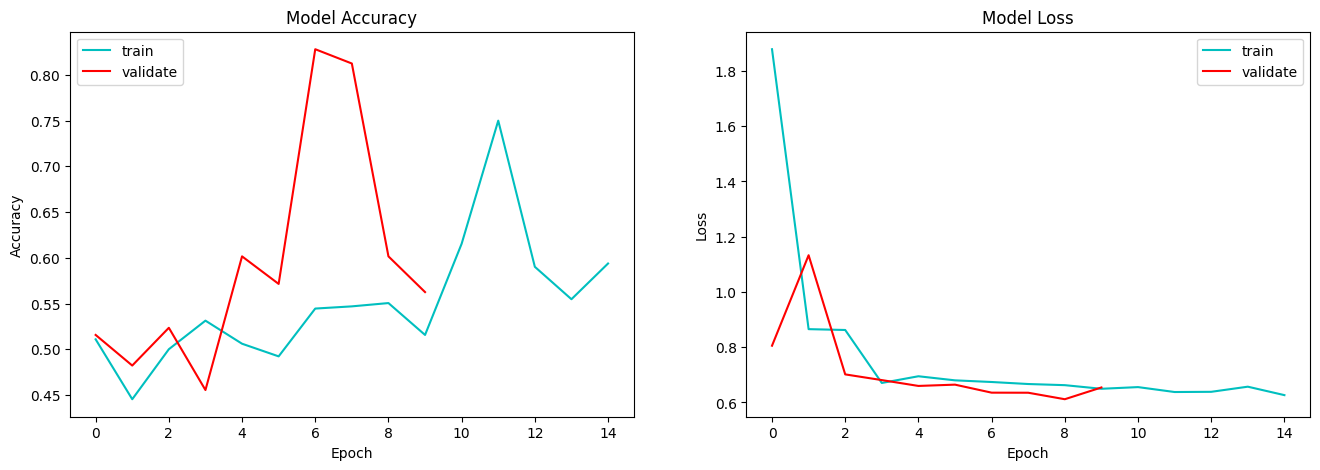

In [10]:
################################################
# Plotting the training history
################################################

#defining a function to show two charts side by side
def plot_training(history):
    fig, axs = plt.subplots(1,2,figsize=(16,5))
    axs[0].plot(history.history['accuracy'], 'c')
    axs[0].plot(history.history['val_accuracy'], 'r')
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')

    axs[1].plot(history.history['loss'], 'c')
    axs[1].plot(history.history['val_loss'], 'r')
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper right')
    plt.show()

#calling the function to show the charts
plot_training(history)

In [11]:
# we saved the best weight out of all training epoch
# Now we are loading the best weight from our disk
model.load_weights('model_best_weights.weights.h5')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step


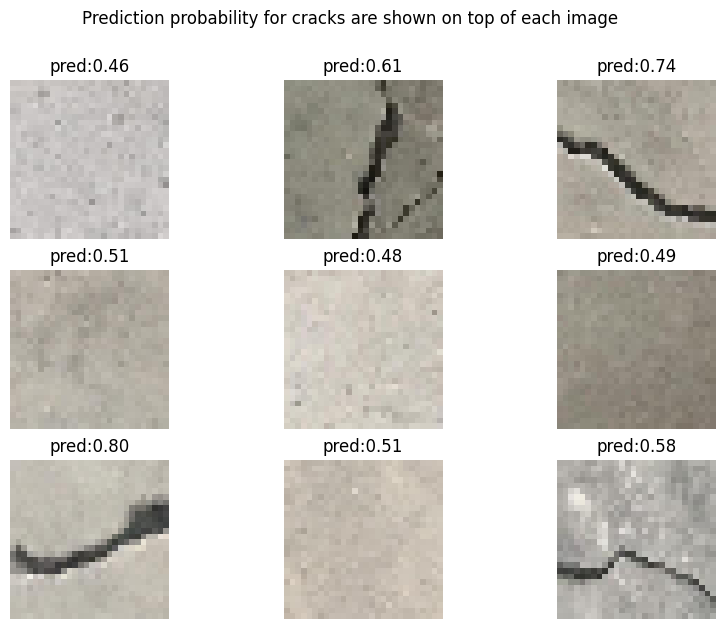

In [12]:
##################################################
# Visualizing some sample prediction
#################################################
import numpy as np
#taking a batch from the validation dataset
# x is whole batch of the input image
# y is the corresponding label for all the images of that batch
x,y = next(validation_generator) # with the next function we take next batch. Every time we run this block of code it will take the next batch from the previous run
# you can see the class index in the dataset by: print(validation_generator.class_indices)
#predict the batch
prediction = model.predict(x)   #this will give the probability of positive class

# We want to show 9 random images from the predicted batch
# we create 9 random index for visualizing images of those indexes
random_index = []
for i in range(9):
    ran = random.randint(1,127)
    random_index.append(ran)

#plotting the images
fig = plt.figure(figsize=(10, 7))
fig.suptitle('Prediction probability for cracks are shown on top of each image')
for k,i in enumerate(random_index):
    fig.add_subplot(3, 3, k+1)
    plt.imshow(x[i])
    plt.axis('off')
    plt.title(f'pred:{prediction[i][0]:.2f}' )

plt.show()